In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

pd.set_option('display.max_columns', 500)

In [2]:
df=pd.read_csv('melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


# Nomor 1

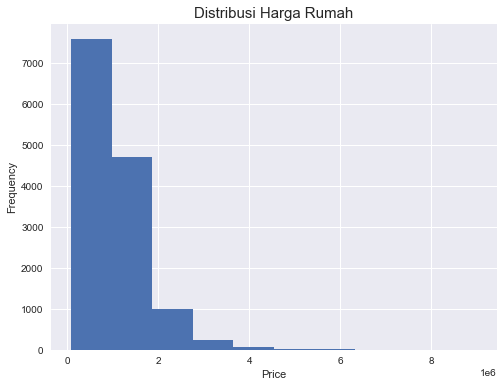

In [3]:
plt.style.use('seaborn')
plt.figure(figsize=(8,6))
plt.hist(df['Price'])
plt.title('Distribusi Harga Rumah', size=15)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


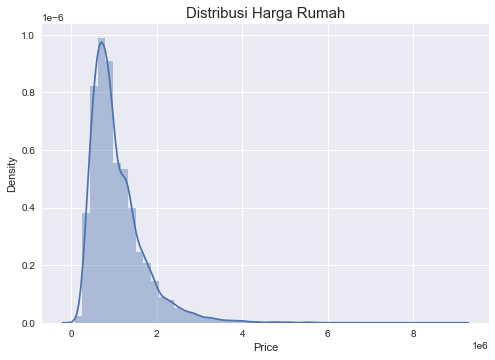

In [4]:
sns.distplot(df['Price'])
plt.title('Distribusi Harga Rumah',size=15)
plt.show()

# Nomor 2

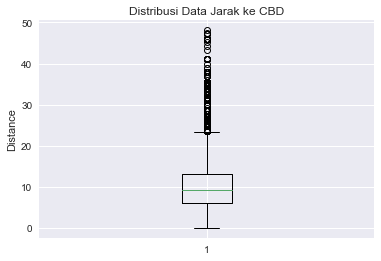

In [5]:
plt.figure(figsize=(6,4))
plt.boxplot(df['Distance'])
plt.title('Distribusi Data Jarak ke CBD')
plt.ylabel('Distance')
plt.show()

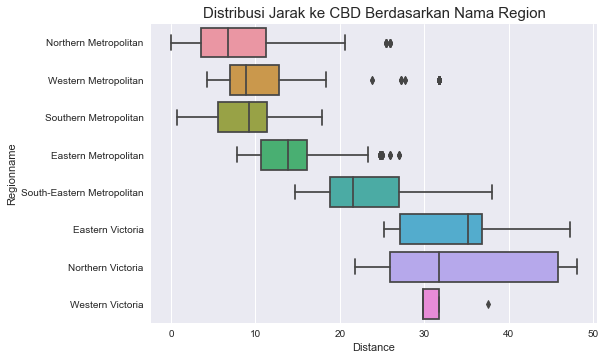

In [6]:
sns.boxplot(y='Regionname',x='Distance',data=df)
plt.title('Distribusi Jarak ke CBD Berdasarkan Nama Region', size=15)
plt.show()

# Nomor 3

In [7]:
median_harga=df[['Type','Price']].groupby('Type').median()
median_harga

,Price
Type,
h,1080000.0
t,846750.0
u,560000.0


In [8]:
x=median_harga.index

In [9]:
y=median_harga['Price']

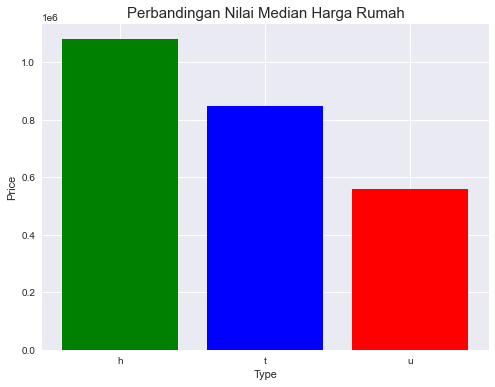

In [10]:
plt.figure(figsize=(8,6))

plt.bar(x,y, color=['g','b','r'])
plt.title('Perbandingan Nilai Median Harga Rumah', size=15)
plt.xlabel('Type')
plt.ylabel('Price')

plt.show()

<AxesSubplot:xlabel='Type', ylabel='Price'>

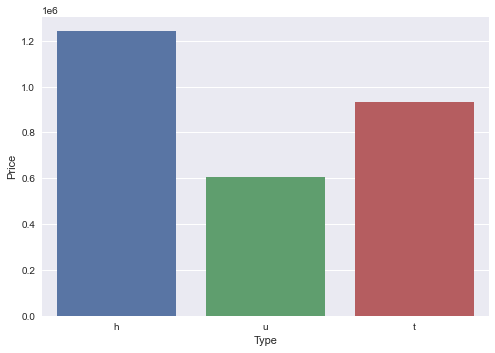

In [11]:
sns.barplot(data=df, x='Type',y='Price', ci=None)

# Nomor 4

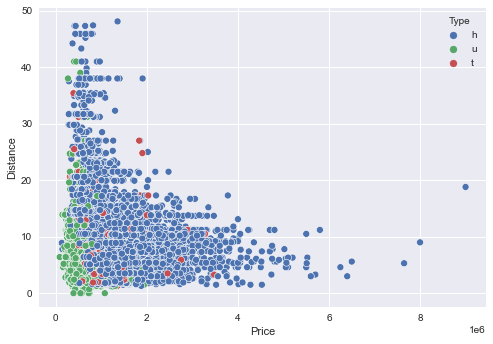

In [12]:

sns.scatterplot(data=df, x='Price', y='Distance', hue='Type')
plt.show()

# Nomor 5

In [13]:
df['Month']=pd.to_datetime(df['Date']).dt.month
df['Month']

0        3
1        4
2        4
3        4
4        4
        ..
13575    8
13576    8
13577    8
13578    8
13579    8
Name: Month, Length: 13580, dtype: int64

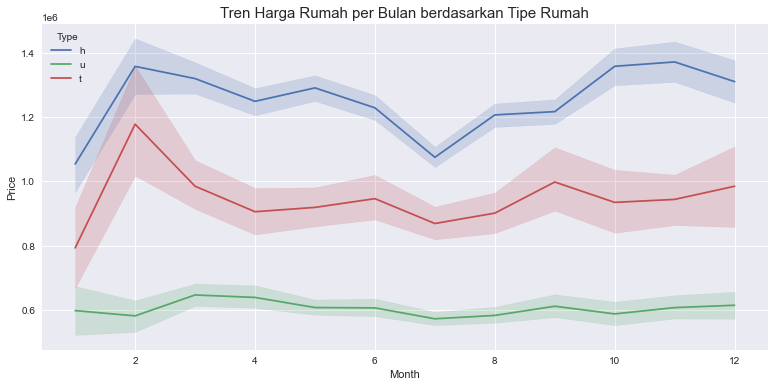

In [14]:
plt.figure(figsize=(13,6))
sns.lineplot(data=df,x='Month',y='Price',hue='Type')
plt.title('Tren Harga Rumah per Bulan berdasarkan Tipe Rumah', size=15)
plt.show()

# Nomor 6

In [15]:
landsize_prop=df.groupby('Regionname').sum()['Landsize'].reset_index()
landsize_prop

,Regionname,Landsize
0,Eastern Metropolitan,932811.0
1,Eastern Victoria,156334.0
2,Northern Metropolitan,2213208.0
3,Northern Victoria,137574.0
4,South-Eastern Metropolitan,276296.0
5,Southern Metropolitan,2390939.0
6,Western Metropolitan,1455153.0
7,Western Victoria,20976.0


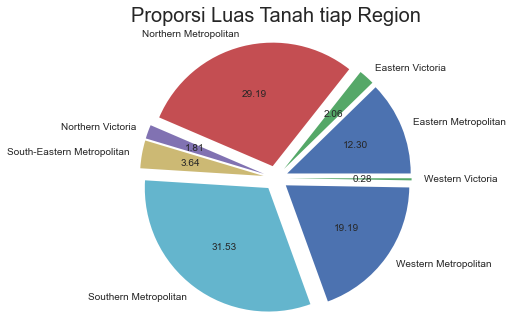

In [16]:
plt.pie(landsize_prop['Landsize'],
       labels=landsize_prop['Regionname'],
       autopct='%.2f',
       explode=(0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1)
       )
plt.axis('equal')
plt.title('Proporsi Luas Tanah tiap Region',size=20)
plt.show()

# Nomor 7 

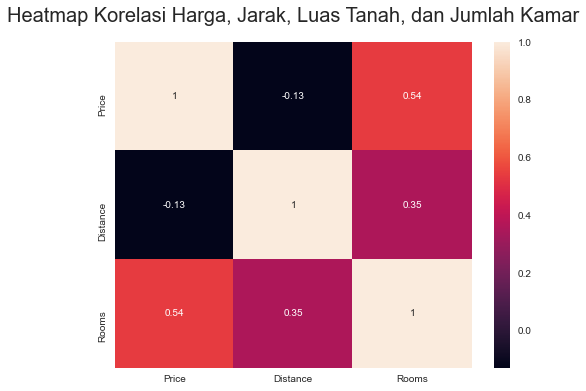

In [17]:
fig,ax=plt.subplots(figsize=(8,6))
ax=sns.heatmap(df[['Price','Distance','Rooms']].corr(method='spearman'), annot=True)
ax.set_title('Heatmap Korelasi Harga, Jarak, Luas Tanah, dan Jumlah Kamar', fontsize=20, pad=20)
plt.show()

# Nomor 8

In [18]:
#buat dataframe baru
df.price = df.sort_values(by='Price',ascending=False).head(10)
melbourne_map=folium.Map(location=[-37.8136, 144.9631],zoom_start=11)
for i in range(10):
    folium.Marker([df.price.iloc[i]['Lattitude'], df.price.iloc[i]['Longtitude']],
              popup=f'''Price: AUD {df.price.iloc[i]['Price']/1000000} M''',
              tooltip= df.price.iloc[0]['Address'],
              icon= folium.Icon(color='red',icon='info-sign')
             ).add_to(melbourne_map)

melbourne_map


<ipython-input-18-d6a7af5e7ed3>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.price = df.sort_values(by='Price',ascending=False).head(10)


In [19]:
#Tugas weekend

Ambil data dari seaborn: tips, mpg, titanic, diamonds,dll;pilih salah satu  
Lakukan analisis sedernaha, gunakan uji statistik dan visualisasi dan ambil kesimpulan dari hasil analisis kalian.